In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import os
import sys
import importlib
import glob
from tqdm import tqdm



module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf

importlib.reload(tools)
importlib.reload(mf)



<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [41]:

acq_settings = {
    'frequency': [128, 64, 32, 16, 8, 4, 2, 1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125],
    'period': [0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128],
    'nb_period': [4000, 2000, 1000, 500, 250, 200, 200, 200, 100, 100, 100, 50, 20, 20, 10],
    'time': [31.25, 31.25, 31.25, 31.25, 31.25, 50, 100, 200, 200, 400, 800, 800, 640, 1280, 1280],
    'DAQ_rate': [16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
}

acq_settings = pd.DataFrame(acq_settings)

In [42]:
exp_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase"
data_processing_folder = exp_path + "/data_processing"
if not os.path.exists(data_processing_folder):
    os.makedirs(data_processing_folder)
folders = sorted(glob.glob(exp_path + "/*Hz"), key=os.path.getmtime)
folders

['C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase\\2024-02-21_17-11-51_128Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase\\2024-02-21_17-17-47_128Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase\\2024-02-21_17-20-20_128Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase\\2024-02-21_17-21-39_128Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase\\2024-02-21_17-23-11_128Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221_light_phase\\2024-02-21_17-25-10_64Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/MCC_DAQ/20240221

In [43]:
timestamps = []
signals = []
all_freqs = []
integration_time = []

for folder in tqdm(folders):
    file = glob.glob(folder + "/*Hz.csv")[0]
    data = pd.read_csv(file, index_col=0)
    all_freqs.append(file.split("Hz\\")[-1].split("Hz")[0])
    timestamps.append(data.Time)
    signals.append(data.Signal)

all_freqs = np.array(all_freqs, dtype=float)
frequency_list = np.unique(all_freqs)

100%|██████████| 46/46 [00:02<00:00, 17.80it/s]


C:\Users\Orlando\AppData\Local\Temp\ipykernel_25208\2347180165.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2, figsize=(10,5))


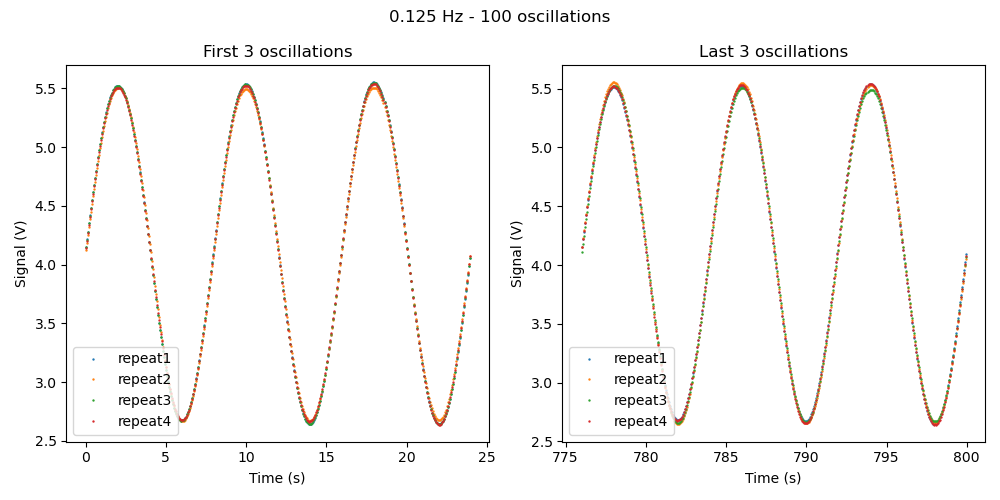

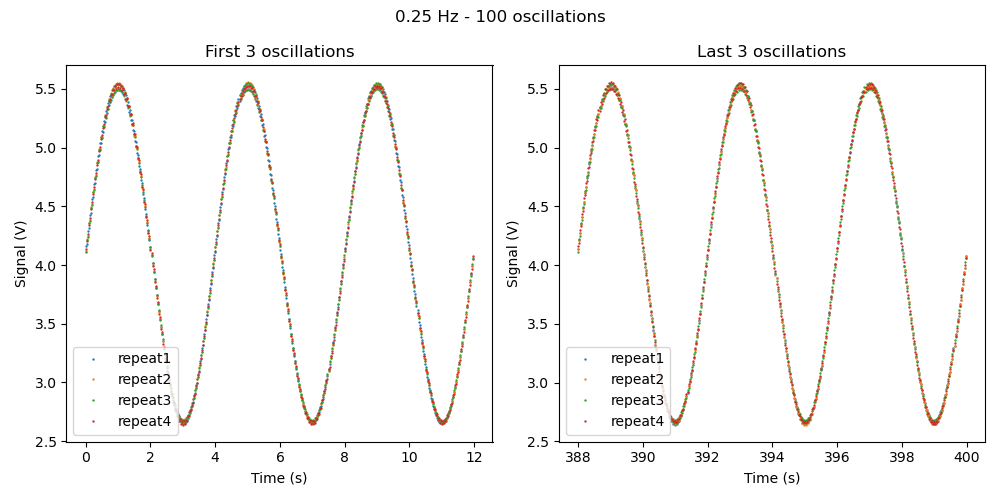

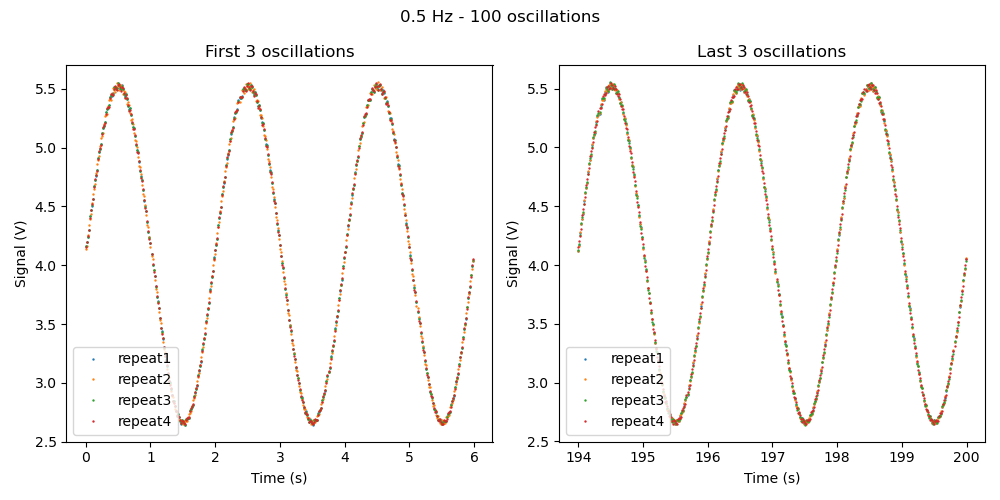

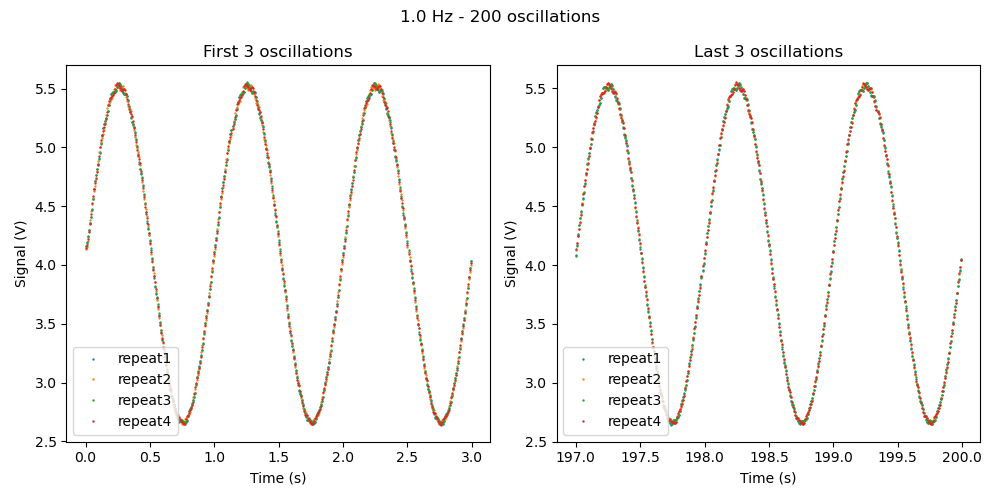

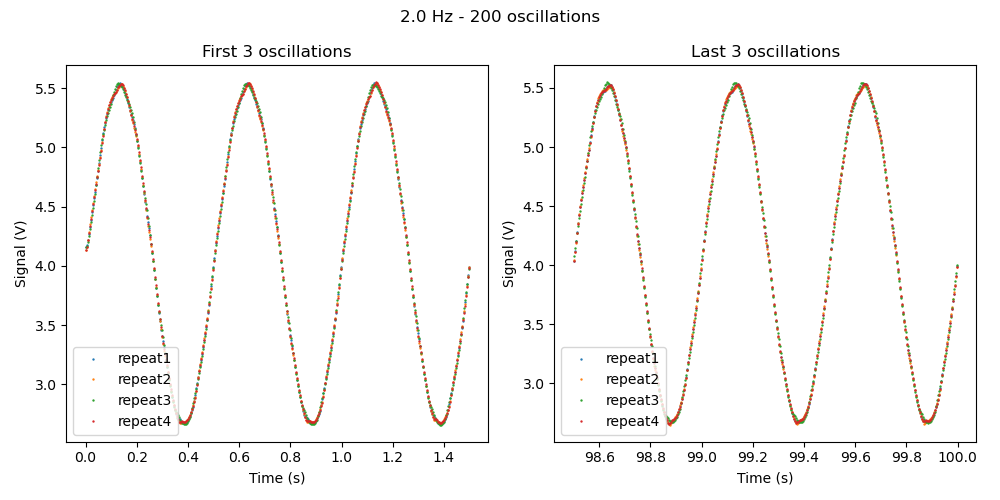

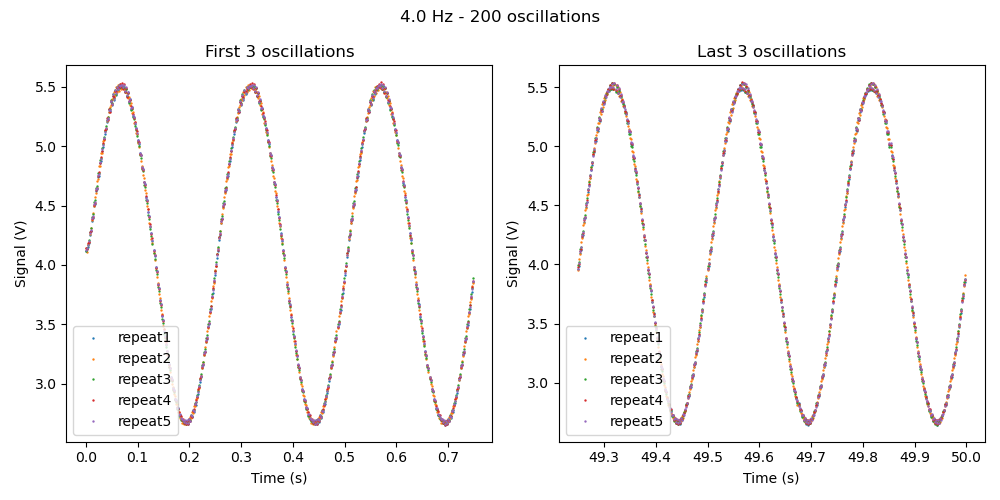

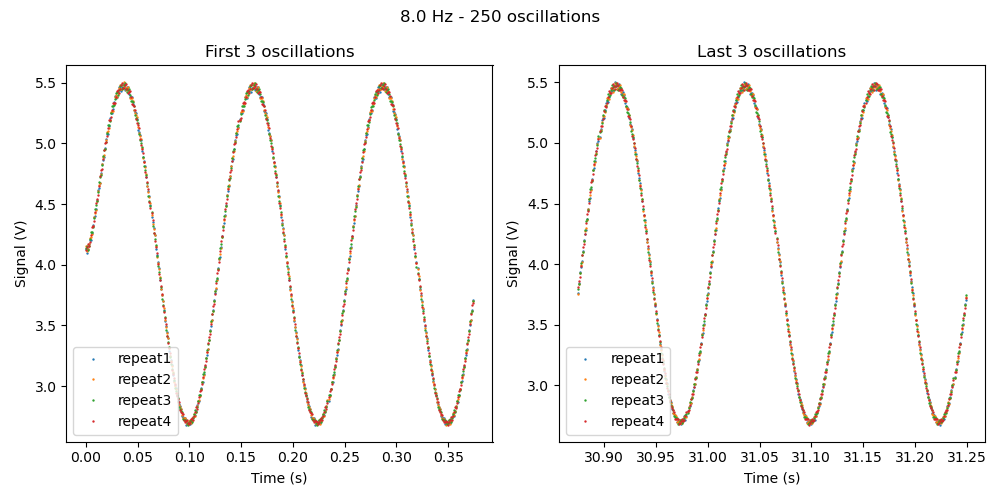

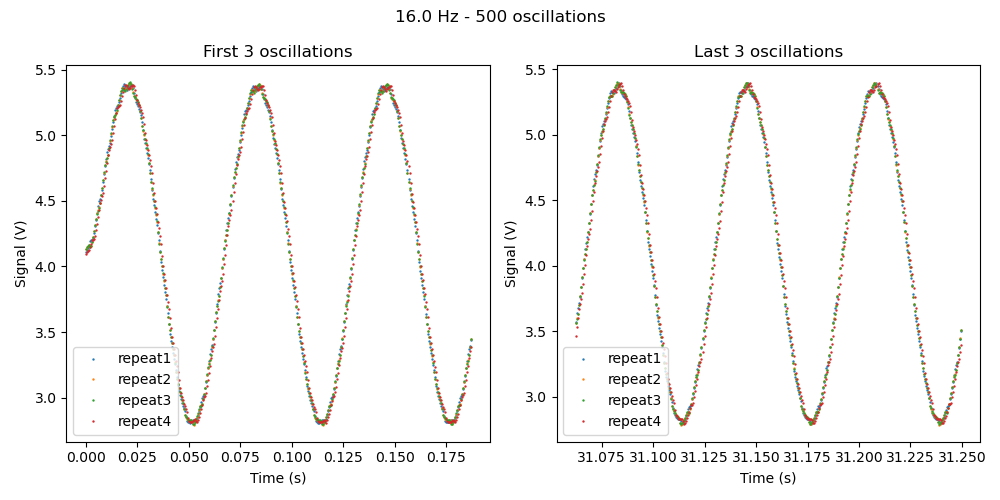

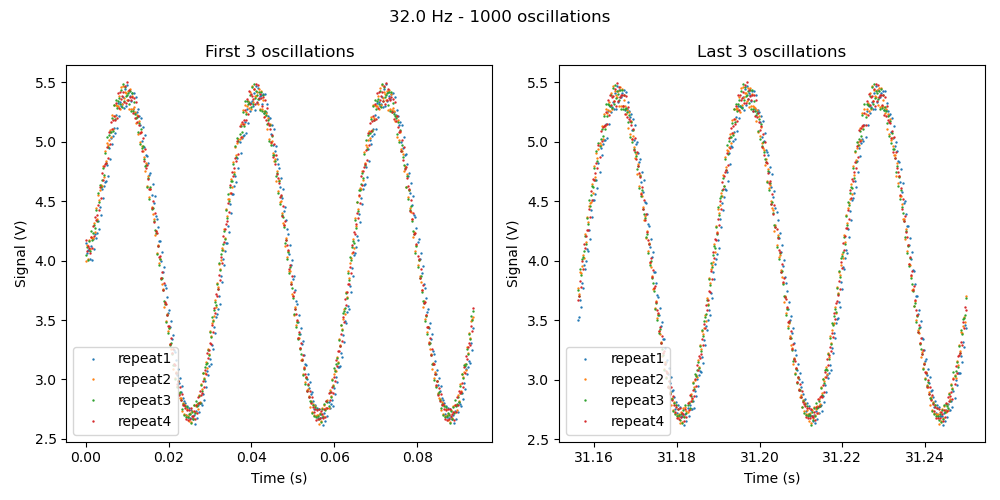

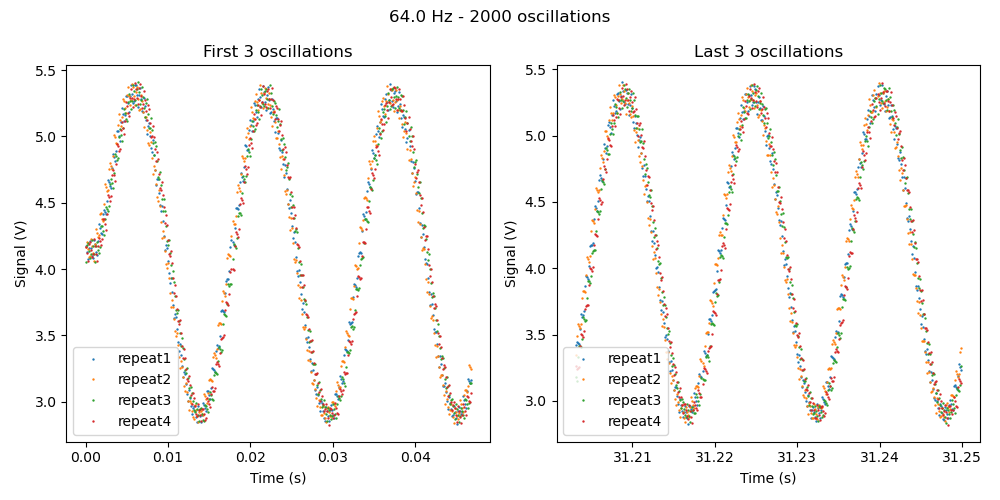

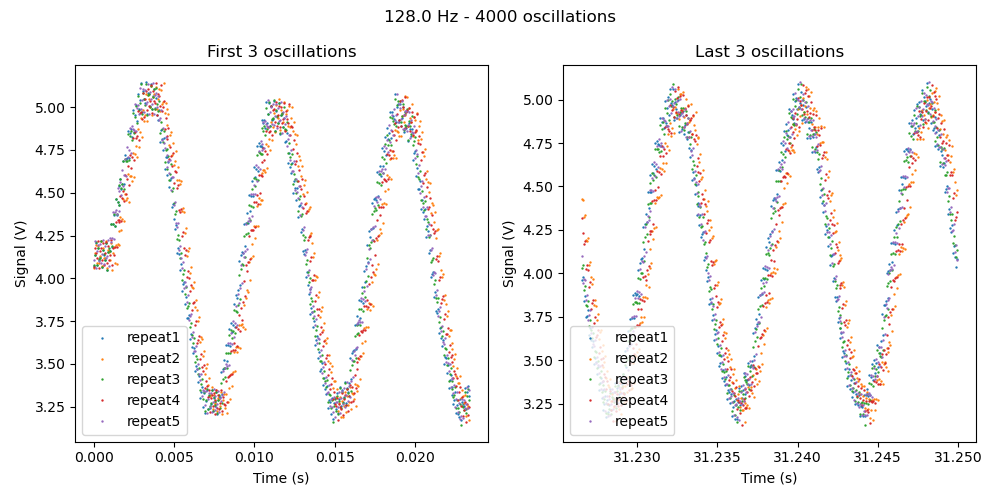

In [45]:
osc_to_plot = 3
for freq in frequency_list:
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    nb_osc = acq_settings.loc[acq_settings.frequency == freq, "nb_period"].values[0]
    daq_rate = acq_settings.loc[acq_settings.frequency == freq, "DAQ_rate"].values[0]
    start = int(1/freq * daq_rate * osc_to_plot)
    fig.suptitle(f"{freq} Hz - {nb_osc} oscillations")
    idx = np.where(all_freqs == freq)[0]
    for k, i in enumerate(idx):
        ax[0].plot(timestamps[i][0:start], signals[i][0:start], 'o', markersize= 0.7, label = f"repeat{k+1}")
        ax[1].plot(timestamps[i][-start:], signals[i][-start:], 'o', markersize= 0.7, label = f"repeat{k+1}")
    ax[0].set_title(f"First {osc_to_plot} oscillations")
    ax[1].set_title(f"Last {osc_to_plot} oscillations")
    for ax in ax:
        ax.legend(loc = "lower left")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Signal (V)")
    fig.tight_layout()
    fig.savefig(f"{data_processing_folder}/oscillations_{freq}Hz.png", dpi=300)

    